In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CSV_FILE = "/home/matt/PycharmProjects/RJI-Photo/csvs/df3dimv5.csv"

df = pd.read_csv(CSV_FILE)

ones_df   = df.loc[df['code'] == 1][['paths', 'code']]
twos_df   = df.loc[df['code'] == 2][['paths', 'code']]
threes_df = df.loc[df['code'] == 3][['paths', 'code']]
fours_df  = df.loc[df['code'] == 4][['paths', 'code']]
fives_df  = df.loc[df['code'] == 5][['paths', 'code']]
sixes_df  = df.loc[df['code'] == 6][['paths', 'code']]
sevens_df = df.loc[df['code'] == 7][['paths', 'code']]

In [3]:
import cv2
from torchvision import transforms

def load_images(df):
    img_list = []

    for _, data in df.iterrows():
        image = cv2.resize(cv2.imread(data['paths'], 0), (720, 480))        
        img_list.append(np.array(image))

    return np.stack(img_list)

ones_imgs = load_images(ones_df)

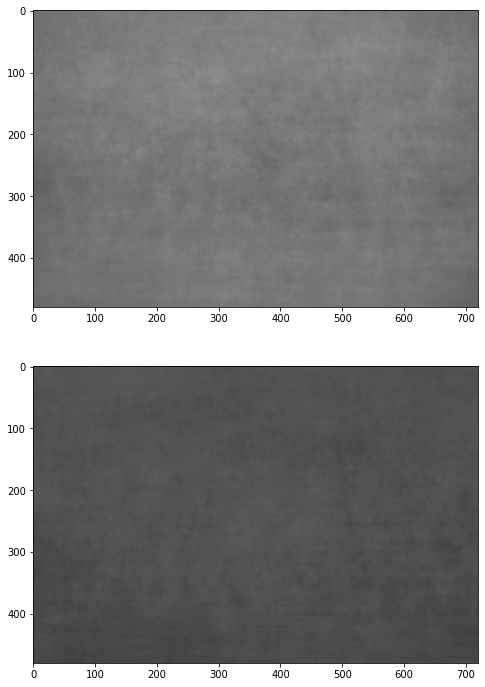

In [4]:
%matplotlib inline

def plot_mean_and_std(img_list):
    mean_img = np.round(np.mean(img_list, axis=0)).astype(int)
    std_img = np.round(np.std(img_list, axis=0)).astype(int)

    fig, axs = plt.subplots(2, 1, figsize=(18, 12))

    axs[0].imshow(mean_img, cmap='Greys_r', vmin=0, vmax=255)
    axs[1].imshow(std_img, cmap='Greys_r', vmin=0, vmax=255)
    plt.show()
    return mean_img, std_img

ones_mean, ones_std = plot_mean_and_std(ones_imgs)

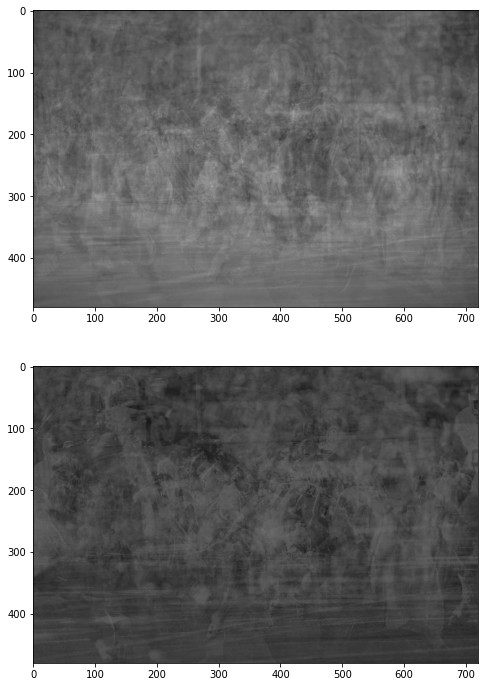

In [5]:
fives_imgs = load_images(fives_df)

fives_mean, fives_std = plot_mean_and_std(fives_imgs)

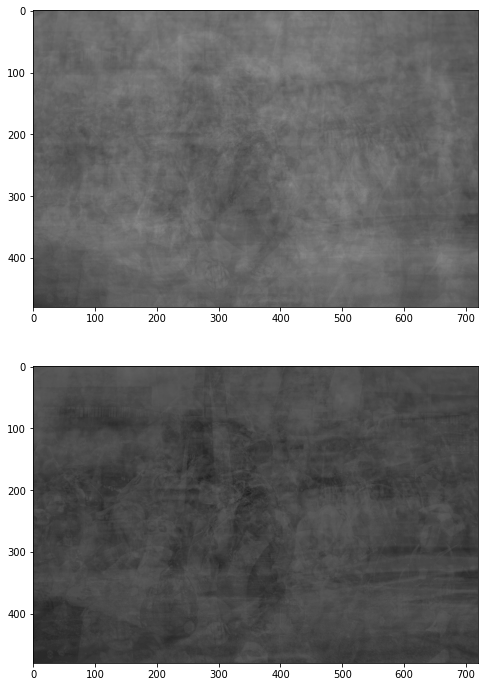

In [6]:
sixes_imgs = load_images(sixes_df)

sixes_mean, sixes_std = plot_mean_and_std(sixes_imgs)

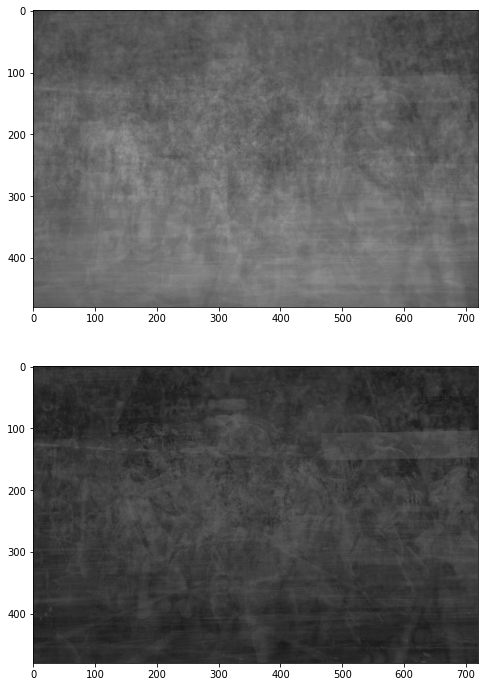

In [7]:
sevens_imgs = load_images(sevens_df)

sevens_mean, sevens_std = plot_mean_and_std(sevens_imgs)

In [8]:
import cv2


def get_points_of_interest(img_list):
    corners_list = []

    for img in img_list:
        corners = cv2.goodFeaturesToTrack(img, 50, 0.01, 10)
        corners_list.append(np.int0(corners))
    return corners_list

ones_corners = get_points_of_interest(ones_imgs)

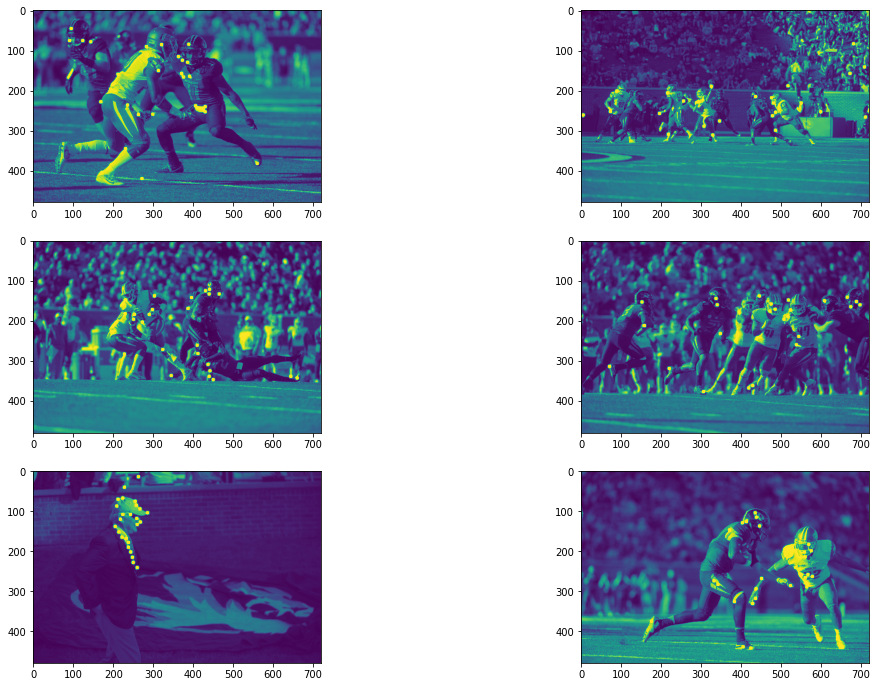

In [9]:
def plot_points_of_interest(corners, images):
    figs, axs = plt.subplots(3,2, figsize=(18, 12))    

    k, l = 0, 0

    for j in range(6):
        for i in corners[j]:
            x,y = i.ravel()
            cv2.circle(images[j],(x,y),5,255,-1)

        axs[k,l].imshow(images[j])
        k += 1
        if k == 3:
            k = 0
            l += 1

    plt.show()

plot_points_of_interest(ones_corners, ones_imgs)

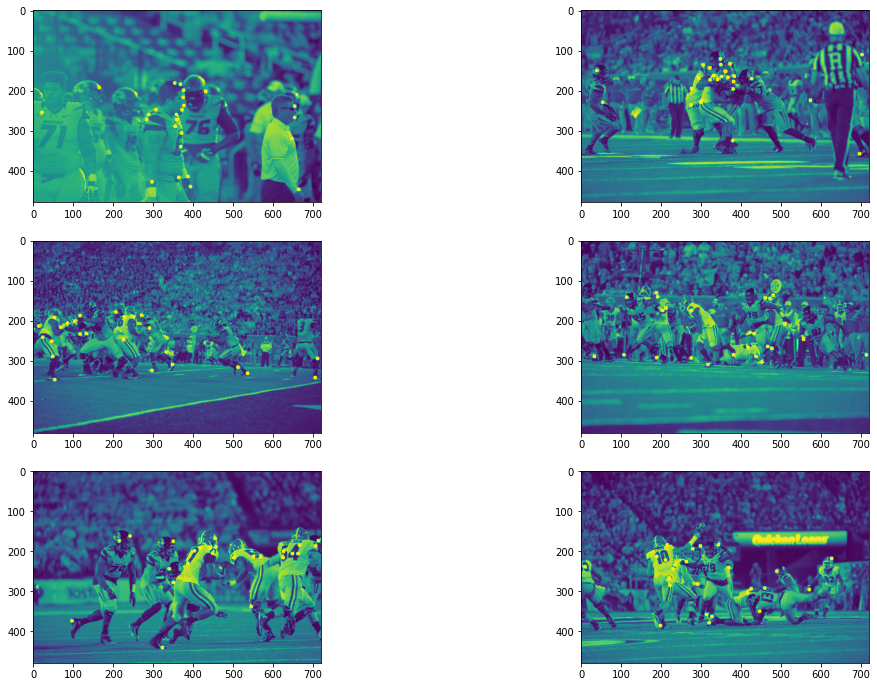

In [10]:
fives_corners = get_points_of_interest(fives_imgs)

plot_points_of_interest(fives_corners, fives_imgs)

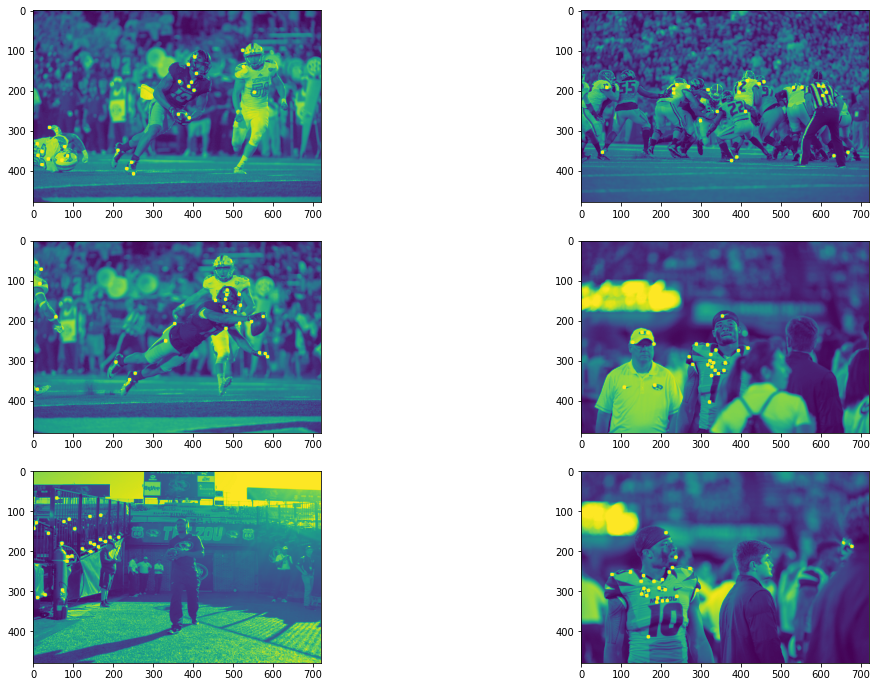

In [11]:
sixes_corners = get_points_of_interest(sixes_imgs)

plot_points_of_interest(sixes_corners, sixes_imgs)

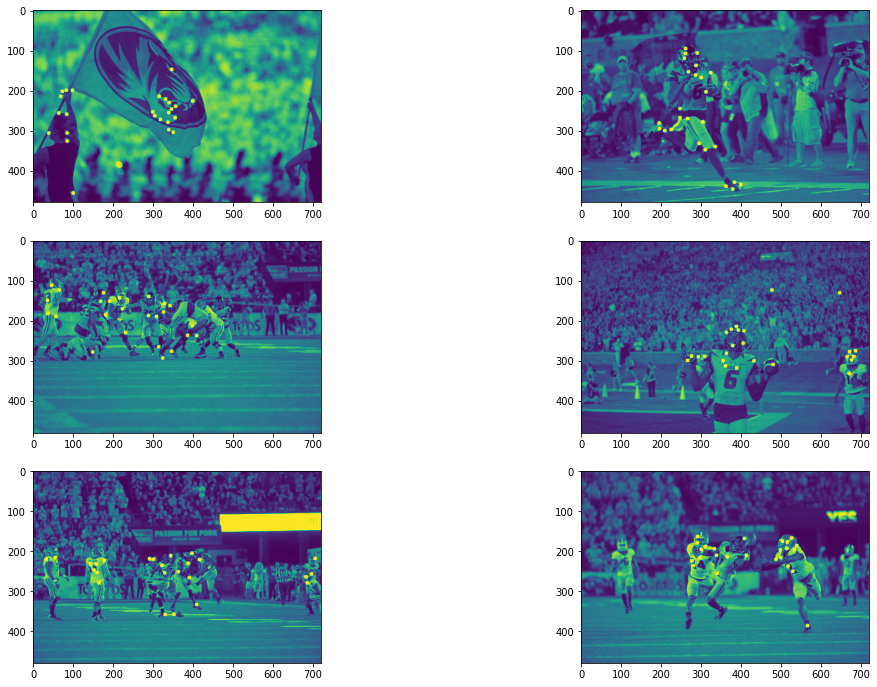

In [12]:
sevens_corners = get_points_of_interest(sevens_imgs)

plot_points_of_interest(sevens_corners, sevens_imgs)

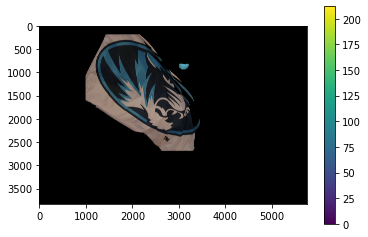

In [28]:
img = cv2.imread(df['paths'].iloc[5538])
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

rect = (1000,200,2500,2500)
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2) | (mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img)
plt.colorbar()
plt.show()